# GTEx v8 RNA-seq data processing for eQTLs : Genotype

# Summary

To summarize the pipeline portion of this document, we have the following:

In the directory:

<code>/tigress/BEE/RNAseq/Data/Genotype/gtex/v8/</code>

The highlights of this processing are:

### The original raw vcf files from GTEx
### Genotype PCs, also from GTEx (top 20)
### Processed genotype files, in alleleic dosage and vcf formats
### Repeat region filtering for alleleic dosage, LD-pruning for vcf also available
### 6846889 variants over MAF 0.05, 3993936 variants over MAF 0.01 but below 0.05, for 838 individuals with some missing genotypes


# Begin notebook

## Data source

The data source in this case is the GTEx v8 release, with the raw data shared in:

<code>/tigress/BEE/gtex/dbGaP-7716/57610/gtex/exchange/GTEx_phs000424/exchange/analysis_releases/GTEx_Analysis_2017-06-05_v8/genotypes/WGS/variant_calls/</code>

I've copied the README file and other support files for this release at:

<code>/tigress/BEE/RNAseq/Data/Genotype/gtex/v8/support_files/</code>

### All files use hg38 (GRCh 38) version of the genome
### The genotypes are derived from Whole Genome Sequencing (WGS) BAM files from 899 GTEx samples, sequenced at an average coverage of 30X (68 samples on Illumina's HiSeq2000 and the remaining on Illumina's HiSeqX), and a variant call file (VCF) for 866 GTEx donors. The 899 BAMs include 30 duplicate pairs and 3 donors that are absent from the variant call set.
### Further QC processing has reduced the number of individuals to 838 - GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_899Indiv_QC_TABLE.tsv file summarizes the QC procedure
### GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_Analysis_Freeze_20genotPCs.txt file contains the top 20 genotyping Principal Components (PCs) computed for 838 donors using the Analysis Freeze WGS VCF, while the GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_Analysis_Freeze_20PCs_eigenValues.txt file has the eigenvalues for these PCs.


## Genotype PCs

In [5]:
%%bash
export proj='/tigress/BEE/RNAseq'

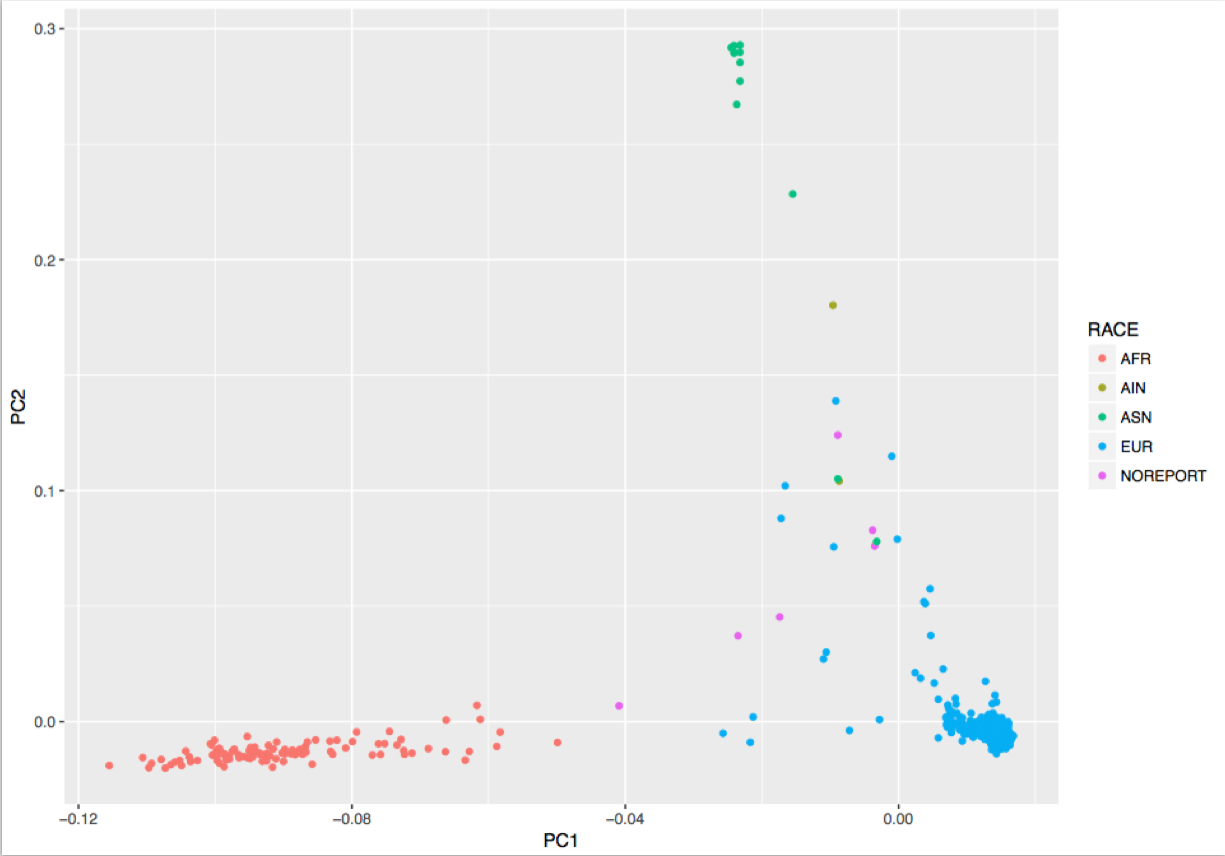

In [7]:
from IPython.display import Image

Image(filename='/Users/brian_jo/Desktop/Project/RNAseq_pipeline/Analysis/auxiliary/genotype/v8/GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_genoPCs_by_race_plots1.png', width = 500) 

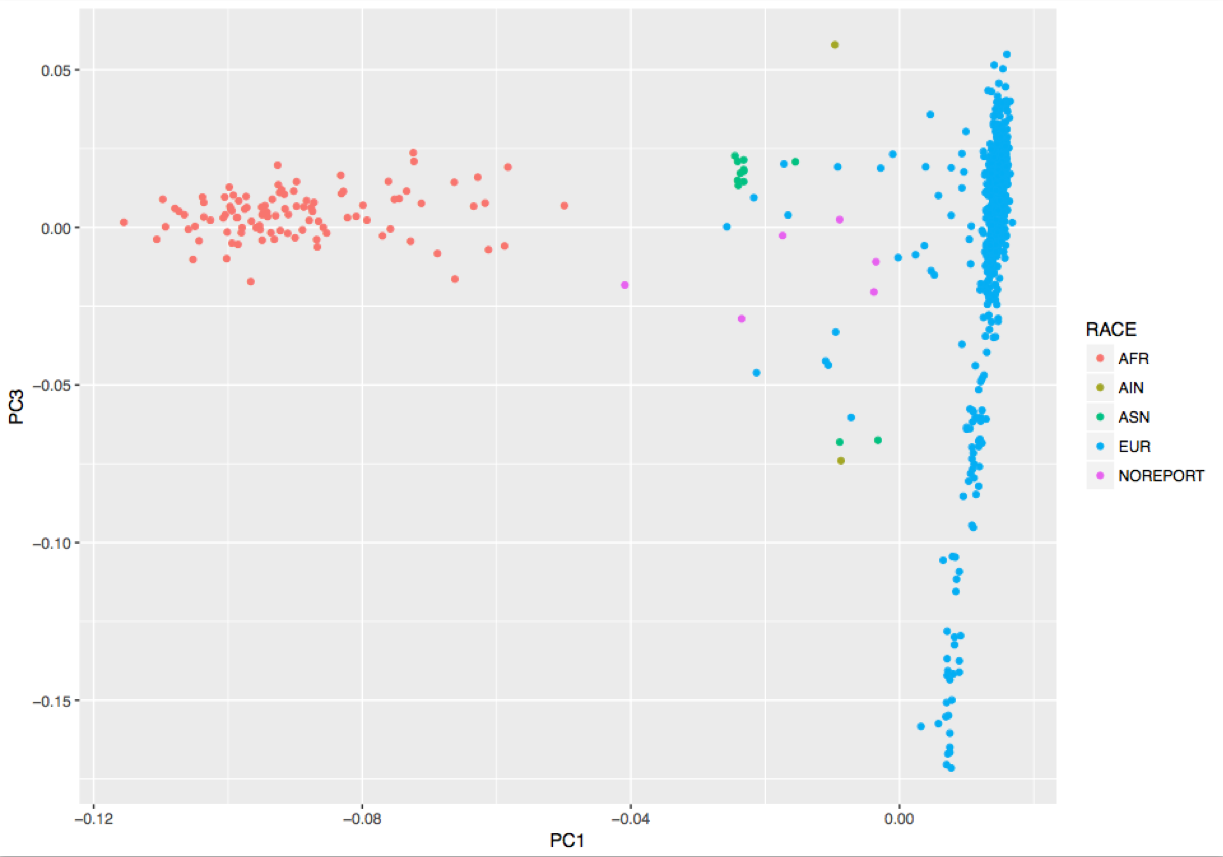

In [8]:
Image(filename='/Users/brian_jo/Desktop/Project/RNAseq_pipeline/Analysis/auxiliary/genotype/v8/GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_genoPCs_by_race_plots2.png', width = 500) 

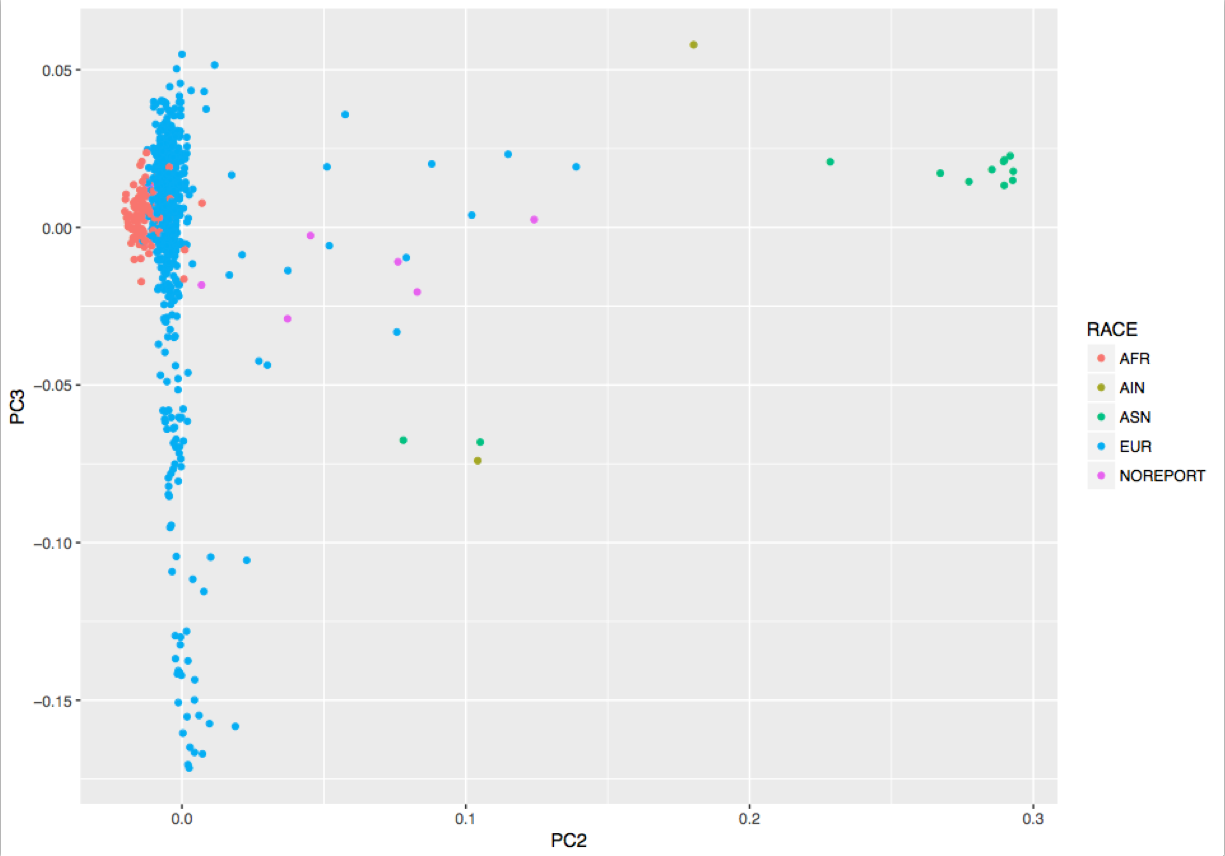

In [9]:

Image(filename='/Users/brian_jo/Desktop/Project/RNAseq_pipeline/Analysis/auxiliary/genotype/v8/GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_genoPCs_by_race_plots3.png', width = 500) 

## Genotype initial processing:

The initial processing script does the following:

### Split up the chromosome vcf files by chromosome
### Output two formats - vcf and alleleic dosage
### Filter by two MAF thresholds - over 0.05, and over 0.01 (and less than or equal to 0.05)
### Print the list of indels into a separate directory (for MAF above 0.01)
### Print the list of multialleleic variants into a separate directory (all MAF levels)

In [ ]:
%%bash

/home/daguiar/bin/clusterize -l 24:00:00 -m 40G -c "python /tigress/BEE/RNAseq/Scripts/genotype/gtex/silver/v8_filter_raw_genotypes_dosage.py"

Running this script outputs files into four subdirectories within: 

<code>/tigress/BEE/RNAseq/Data/Genotype/gtex/v8/</code>

<code>allelic_dosage</code> - Number of alternative alleles, format taken by MatrixEQTL

<code>vcf</code> - Filtered version of the vcf files

<code>indels</code> - List of indels above MAF 0.01

<code>multiallelic</code> - List of multialleleic variants, at all MAF levels

The number of lines for each MAF threshold is:

<code>
wc -l *05.txt
      346397 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr10_vcf_MAF_05.txt
      339136 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr11_vcf_MAF_05.txt
      317596 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr12_vcf_MAF_05.txt
      253713 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr13_vcf_MAF_05.txt
      218259 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr14_vcf_MAF_05.txt
      192139 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr15_vcf_MAF_05.txt
      199791 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr16_vcf_MAF_05.txt
      176420 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr17_vcf_MAF_05.txt
      193063 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr18_vcf_MAF_05.txt
      151176 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr19_vcf_MAF_05.txt
      510469 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr1_vcf_MAF_05.txt
      149648 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr20_vcf_MAF_05.txt
       92347 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr21_vcf_MAF_05.txt
       90931 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr22_vcf_MAF_05.txt
      550439 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr2_vcf_MAF_05.txt
      470334 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr3_vcf_MAF_05.txt
      492704 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr4_vcf_MAF_05.txt
      422035 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr5_vcf_MAF_05.txt
      445538 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr6_vcf_MAF_05.txt
      389254 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr7_vcf_MAF_05.txt
      362243 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr8_vcf_MAF_05.txt
      287466 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr9_vcf_MAF_05.txt
      195814 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chrX_vcf_MAF_05.txt
     6846912 total
</code> for a total of 6846889 variants over MAF 0.05

<code>
wc -l *01.txt
     191635 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr10_vcf_MAF_01.txt
     182799 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr11_vcf_MAF_01.txt
     182545 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr12_vcf_MAF_01.txt
     130960 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr13_vcf_MAF_01.txt
     128286 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr14_vcf_MAF_01.txt
     113865 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr15_vcf_MAF_01.txt
     127224 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr16_vcf_MAF_01.txt
     107295 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr17_vcf_MAF_01.txt
     108225 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr18_vcf_MAF_01.txt
      87001 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr19_vcf_MAF_01.txt
     306786 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr1_vcf_MAF_01.txt
      89373 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr20_vcf_MAF_01.txt
      53863 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr21_vcf_MAF_01.txt
      57429 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr22_vcf_MAF_01.txt
     325005 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr2_vcf_MAF_01.txt
     277586 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr3_vcf_MAF_01.txt
     276480 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr4_vcf_MAF_01.txt
     249744 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr5_vcf_MAF_01.txt
     251470 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr6_vcf_MAF_01.txt
     227994 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr7_vcf_MAF_01.txt
     217532 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr8_vcf_MAF_01.txt
     170583 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chr9_vcf_MAF_01.txt
     130279 GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_chrX_vcf_MAF_01.txt
    3993959 total
</code> for a total of 3993936 variants over MAF 0.01 but less than or equal to MAF 0.05


## Saving SNPs that are not in a repeated element

Based on RepeatMasker annotations (that we saved in the extended metadata files above), we can write out the SNPs that are not in a repeated element separately.

Note: Previously, there was a feature that also filtered on MAF 0.05, but now this filter is applied in a tissue-specific fashion, at runtime for association testing.

In [ ]:
%%bash

python /tigress/BEE/RNAseq/Scripts/genotype/gtex/silver/v8_collect_genotypes_not_in_repeat_wrapper.py

## LD-pruning at 0.5 for vcf files

This step will produce a subset of the SNPs that we can use down the line, for association methods that are more heavy computationally or require that the tests be relatively independent.


In [ ]:
%%bash

/home/daguiar/bin/clusterize -l 24:00:00 -m 32G -c "python /tigress/BEE/RNAseq/Scripts/genotype/gtex/silver/v8_ld_pruned_subset_genotypes.py"

<code>
wc -l *MAF_01.in
   57778 chr10_MAF_01.in
   55486 chr11_MAF_01.in
   54853 chr12_MAF_01.in
   40274 chr13_MAF_01.in
   38054 chr14_MAF_01.in
   35520 chr15_MAF_01.in
   40173 chr16_MAF_01.in
   34689 chr17_MAF_01.in
   33853 chr18_MAF_01.in
   28166 chr19_MAF_01.in
   93240 chr1_MAF_01.in
   28482 chr20_MAF_01.in
   16814 chr21_MAF_01.in
   18295 chr22_MAF_01.in
   97192 chr2_MAF_01.in
   80884 chr3_MAF_01.in
   79720 chr4_MAF_01.in
   74492 chr5_MAF_01.in
   71602 chr6_MAF_01.in
   68359 chr7_MAF_01.in
   63455 chr8_MAF_01.in
   52223 chr9_MAF_01.in
   38854 chrX_MAF_01.in
 1202458 total
</code> for a total of 1202458 variants over MAF 0.01 but less than or equal to MAF 0.05 after LD-pruning

<code>
wc -l *MAF_05.in
   34936 chr10_MAF_05.in
   33532 chr11_MAF_05.in
   32279 chr12_MAF_05.in
   25952 chr13_MAF_05.in
   22113 chr14_MAF_05.in
   20663 chr15_MAF_05.in
   21770 chr16_MAF_05.in
   19554 chr17_MAF_05.in
   20681 chr18_MAF_05.in
   16338 chr19_MAF_05.in
   51890 chr1_MAF_05.in
   15961 chr20_MAF_05.in
    9550 chr21_MAF_05.in
   10156 chr22_MAF_05.in
   53924 chr2_MAF_05.in
   45994 chr3_MAF_05.in
   46669 chr4_MAF_05.in
   40558 chr5_MAF_05.in
   42646 chr6_MAF_05.in
   38307 chr7_MAF_05.in
   34965 chr8_MAF_05.in
   29988 chr9_MAF_05.in
   21636 chrX_MAF_05.in
  690062 total
</code> for a total of 690062 variants over MAF 0.05 after LD-pruning